In [25]:
import pandas as pd
import numpy as np
import dill as pickle

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import TSNE

# from keras.datasets import mnist
# from keras.models import Model
# from keras.layers import Dense, Input
# from keras import regularizers

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import get_cmap


complete_preprocessed = pd.read_pickle("preprocessed")
complete = pd.read_pickle("complete")
tsne = pickle.load(open("tSNE", "rb"))
complete.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'educationNr',
       'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry',
       'salary', 'countryProvided', 'country_typeI', 'nationals',
       'educationGeneral'], dtype=object)

In [6]:

    
# pca = PCA(n_components=2, random_state=0)
# tsne = TSNE(n_components=2, random_state=0, perplexity=50) # Ici 30 semble mieux que 50.

# df_pca_2d = pca.fit_transform(complete_preprocessed)
# df_tsne_2d = tsne.fit_transform(complete_preprocessed)

# df_tsne_2d = tsne.transform(complete_preprocessed)
df_tsne_2d = tsne.embedding_

array([[-62.41272354, -12.30766678],
       [-34.72774506,  38.10370636],
       [ 27.97219849, -32.43561172],
       ..., 
       [-23.58042908, -12.54105186],
       [ 25.07641602,  -4.43594074],
       [ 19.82580948, -54.06336212]], dtype=float32)

In [7]:
df_sampled = complete_preprocessed.sample(n=2000)

In [7]:


def drawData(X_scores, color_column, titre="2D Viz", legend_loc = "upper right"):
    x_max = X_scores[:, 0].max()
    x_min = X_scores[:, 0].min()
    y_max = X_scores[:, 1].max()
    y_min = X_scores[:, 1].min()
    
    len_x = x_max - x_min
    len_y = y_max - y_min

#     xx, yy = np.meshgrid(np.linspace(x_min - len_x / 10, x_max + len_x / 10, 50), 
#                      np.linspace(y_min - len_y, y_max + len_y, 50))
#     Z = ilf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

    plt.title(titre)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    
    color_class = color_column.unique()
    color_num = color_class.size
    print(color_num)
    cm = get_cmap('gist_rainbow')
    cgen = (cm(1.*i/color_num) for i in range(color_num))
    
    plt.scatter(X_scores[:, 0], X_scores[:, 1], c=color_column)
    
#     for i, color in enumerate(cgen):
#         plt.scatter(X_scores[:, 0][color_column == color_class[i]], X_scores[:, 1][color_column == color_class[i]], c=color,
#                  s=20, edgecolor='k')
    
    plt.axis('tight')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
#    plt.legend([TN, TP, FN, FP], ["True negative", "True positive", "False negative", "False positive"], loc=legend_loc)

In [26]:
filename_drawData = "drawData"
pickle.dump(drawData, open(filename_drawData, 'wb'))

In [11]:
# in order to plot in a 2D figure
encoding_dim = 2

# this is our input placeholder
input_var = Input(shape=(64,))

# encoder layers
encoded = Dense(10, activation='relu')(input_var)
encoder_output = Dense(encoding_dim)(encoded)

# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='tanh')(decoded)

# construct the autoencoder model
autoencoder = Model(input=input_var, output=decoded)

# construct the encoder model for plotting
encoder = Model(input=input_var, output=encoder_output)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [12]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(df_sampled, df_sampled,
                nb_epoch=10,
                batch_size=10,
                shuffle=True)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
2000/2000 [==============================] - 44s 22ms/step - loss: 0.0943
Epoch 2/10
2000/2000 [==============================] - 1s 417us/step - loss: 0.0683
Epoch 3/10
2000/2000 [==============================] - 1s 420us/step - loss: 0.0610
Epoch 4/10
2000/2000 [==============================] - 1s 424us/step - loss: 0.0563
Epoch 5/10
2000/2000 [==============================] - 1s 394us/step - loss: 0.0538
Epoch 6/10
2000/2000 [==============================] - 1s 366us/step - loss: 0.0521
Epoch 7/10
2000/2000 [==============================] - 1s 360us/step - loss: 0.0514
Epoch 8/10
2000/2000 [==============================] - 1s 362us/step - loss: 0.0509
Epoch 9/10
2000/2000 [==============================] - 1s 363us/step - loss: 0.0504
Epoch 10/10
2000/2000 [==============================] - 1s 364us/step - loss: 0.0499


In [17]:


# in order to plot in a 2D figure
encoding_dim = 2

# this is our input placeholder
input_var = Input(shape=(64,))

# encoder layers
encoded2 = Dense(10, activation='relu', activity_regularizer = regularizers.l1(10e-4))(input_var)
encoder_output2 = Dense(encoding_dim)(encoded2)

# decoder layers
decoded2 = Dense(10, activation='relu')(encoder_output2)
decoded2 = Dense(64, activation='tanh')(decoded2)

# construct the autoencoder model
autoencoder2 = Model(input=input_var, output=decoded2)

# construct the encoder model for plotting
encoder2 = Model(input=input_var, output=encoder_output2)

autoencoder2.compile(optimizer='adam', loss='mse')

autoencoder2.fit(df_sampled, df_sampled,
                nb_epoch=20,
                batch_size=10,
                shuffle=True)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
2000/2000 [==============================] - 1s 464us/step - loss: 0.1075
Epoch 2/20
2000/2000 [==============================] - 1s 379us/step - loss: 0.0755
Epoch 3/20
2000/2000 [==============================] - 1s 377us/step - loss: 0.0730
Epoch 4/20
2000/2000 [==============================] - 1s 381us/step - loss: 0.0725
Epoch 5/20
2000/2000 [==============================] - 1s 383us/step - loss: 0.0710
Epoch 6/20
2000/2000 [==============================] - 1s 380us/step - loss: 0.0667
Epoch 7/20
2000/2000 [==============================] - 1s 378us/step - loss: 0.0634
Epoch 8/20
2000/2000 [==============================] - 1s 378us/step - loss: 0.0617
Epoch 9/20
2000/2000 [==============================] - 1s 377us/step - loss: 0.0608
Epoch 10/20
2000/2000 [==============================] - 1s 382us/step - loss: 0.0603
Epoch 11/20
2000/2000 [==============================] - 1s 378us/step - loss: 0.0599
Epoch 12/20
2000/2000 [==============================] - 1s 385

2


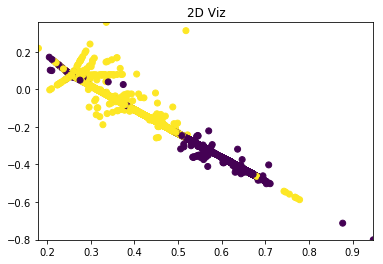

In [32]:
df_encoded2 = encoder2.predict(df_sampled, batch_size = 20)

drawData(df_encoded2, df_sampled["salary_<=50K"])

2
2
2
2


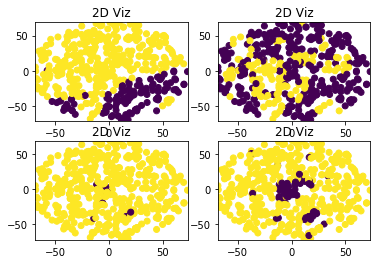

In [21]:
complete_preprocessed.shape[0]
echantillon = np.random.choice(complete_preprocessed.shape[0], 500, replace=False)

plt.figure()
plt.subplot(2, 2, 1)
drawData(df_tsne_2d[echantillon, :], complete_preprocessed.loc[echantillon, "salary_<=50K"])
plt.subplot(2, 2, 2)
drawData(df_tsne_2d[echantillon, :], complete_preprocessed.loc[echantillon, "isFemale"])
plt.subplot(2, 2, 3)
drawData(df_tsne_2d[echantillon, :], complete_preprocessed.loc[echantillon, "countryProvided"])
plt.subplot(2, 2, 4)
drawData(df_tsne_2d[echantillon, :], complete_preprocessed.loc[echantillon, "nationals"])
plt.show()

20
14
7
16


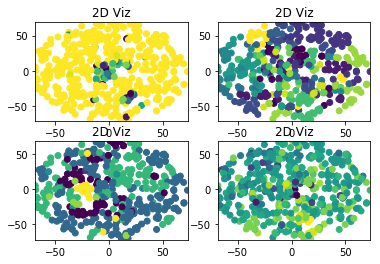

In [22]:
plt.figure()
plt.subplot(2, 2, 1)

drawData(df_tsne_2d[echantillon, :],
        complete.loc[echantillon, "nativeCountry"].astype('category').cat.codes)
plt.subplot(2, 2, 2)
drawData(df_tsne_2d[echantillon, :],
        complete.loc[echantillon, "occupation"].astype('category').cat.codes)
plt.subplot(2, 2, 3)
drawData(df_tsne_2d[echantillon, :],
        complete.loc[echantillon, "maritalStatus"].astype('category').cat.codes)
plt.subplot(2, 2, 4)
drawData(df_tsne_2d[echantillon, :],
        complete.loc[echantillon, "educationNr"])
plt.show()

Maintenant on va sauvegarder les modèles de t-SNE et d'auto-encoder pour l'utilisation ultérieure.

In [59]:
filename_tsne = "tSNE"
pickle.dump(tsne, open(filename_tsne, 'wb'))

# filename_autoencoder = "autoencoder"
# pickle.dump(model, open(filename_autoencoder, 'wb'))

In [13]:
type(df_tsne_2d)

numpy.ndarray